In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function definitions

def delay_probabilities(lambda_rate, m):
    """
    Generate a probability vector for different delays (0 - m-1 days) based on an exponential distribution with rate lambda.
    
    """
    # Generate exponential probabilities for delays 0, 1, 2, and 3
    delays = np.array([np.exp(-lambda_rate * day) for day in range(m)])
    
    # Normalize to make the sum equal to 1
    probabilities = delays / delays.sum()
    
    return probabilities

def lambda_sampling(distribution_type, n, min_val=1, max_val=5, **kwargs):
    """
    Generate n samples between min_val and max_val using a specified distribution.
    
    Parameters:
    distribution_type (str): The type of distribution to sample from ('normal' or 'uniform').
    n (int): The number of samples to generate.
    min_val (float): The minimum bound for the samples.
    max_val (float): The maximum bound for the samples.
    kwargs: Additional parameters for the distribution:
        - For 'normal': mean and std (standard deviation).
        - For 'uniform': no additional parameters required.

    Returns:
    np.ndarray: An array of n samples in the range [min_val, max_val].
    """
    samples = []
    
    if distribution_type == 'normal':
        mean = kwargs.get('mean', (min_val + max_val) / 2)  # Default mean is the midpoint
        std = kwargs.get('std', (max_val - min_val) / 4)    # Default std to cover range within ~2 std devs
        while len(samples) < n:
            sample = np.random.normal(mean, std)
            if min_val <= sample <= max_val:  # Restrict to range [min_val, max_val]
                samples.append(sample)

    elif distribution_type == 'uniform':
        samples = np.random.uniform(min_val, max_val, n)
    
    return np.array(samples)

def delay_probabilities_set(n, dist = 'normal', min_val=1, max_val=5, mean=3, std=0.8, m=4):
    """
    Generate a set of n probability vectors for different delays (0 - m-1 days) based on an exponential distribution with rate lambda.
    
    Parameters:
    n (int): The number of probability vectors to generate.
    min_val (float): The minimum bound for the samples.
    max_val (float): The maximum bound for the samples.
    mean (float): The mean value for the normal distribution.
    std (float): The standard deviation for the normal distribution.
    m (int): The number of days to consider for the delay probabilities.

    Returns:
    list: A list of n probability vectors for delays 0 to m-1 days.
    """
    lambda_set_n = lambda_sampling(dist, n, min_val, max_val, mean=mean, std=std)
    
    probabilities_sample = []
    for lambda_rate in lambda_set_n:
        probabilities_sample.append(delay_probabilities(lambda_rate, m))
    
    return probabilities_sample


def sample_delay(proba_subvector):
    """
    Sample a delay from a probability vector.
    
    Parameters:
    proba_subvector (np.ndarray): A probability vector for delays 0 to m-1 days.
    
    Returns:
    int: The sampled delay.
    """
    return np.random.choice(len(proba_subvector), p=proba_subvector)

def make_delay(proba_vector):
    delay = np.zeros(len(proba_vector))
    for i in range(len(proba_vector)):
        delay[i] = sample_delay(proba_vector[i])
    return delay

def plot_delay_bars(t_probabilities_sample):
    # Convert the list of lists to a NumPy array
    data = np.array(t_probabilities_sample).T  # Transpose to stack each row

    # Define figure and bar width
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.6

    # Plot each stack section in the bar
    for i in range(data.shape[0]):
        ax.bar(range(data.shape[1]), data[i], bottom=np.sum(data[:i], axis=0), label=f'Delay = {i+1}', width=bar_width)

    # Add labels and title
    ax.set_xlabel("Delay samples")
    ax.set_ylabel("Probability Value")
    ax.set_title("Random delay sample distributions for 1 simulation of 50 patients")
    ax.legend(title="Delays", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set x-ticks to correspond to each vector
    plt.xticks(range(data.shape[1]), [f'p {i+1}' for i in range(data.shape[1])], rotation=45)

    # Adjust layout to fit everything
    plt.tight_layout()
    plt.show()


In [16]:
################################### EDIT HERE ######################################################
n_patients = 1800
n = int(n_patients/4)
m = 7
dist = 'normal'
min_val = 0.01
max_val = 0.1


num_vectors = 48
p_disrupt = 0.05
v = 1
####################################################################################################


In [10]:
delay_vectors = []


for i in range(num_vectors):
    probabilities_sample = delay_probabilities_set(n, dist, min_val, max_val, m=m)
    delay_sample = make_delay(probabilities_sample)
    delay_vectors.append(delay_sample)


In [11]:
print(len(delay_vectors))
print(delay_vectors)

48
[array([3., 5., 1., 4., 5., 4., 4., 2., 4., 1., 1., 5., 5., 6., 2., 1., 0.,
       6., 4., 1., 0., 6., 2., 1., 0., 2., 0., 0., 0., 3., 0., 1., 0., 0.,
       4., 6., 1., 3., 0., 4., 2., 4., 1., 0., 1., 6., 0., 6., 6., 1., 2.,
       0., 4., 4., 5., 3., 1., 3., 2., 5., 3., 4., 3., 1., 1., 0., 0., 3.,
       0., 4., 4., 2., 0., 1., 3., 1., 2., 0., 4., 6., 2., 4., 3., 0., 1.,
       2., 6., 0., 2., 2., 0., 6., 3., 1., 4., 3., 3., 3., 1., 4., 0., 0.,
       5., 6., 3., 3., 4., 2., 3., 1., 0., 1., 5., 4., 3., 0., 0., 1., 1.,
       5., 1., 2., 2., 0., 1., 0., 4., 4., 0., 3., 5., 0., 5., 2., 5., 4.,
       6., 5., 1., 3., 0., 3., 4., 1., 0., 3., 6., 2., 0., 1., 5., 6., 6.,
       1., 1., 4., 6., 4., 4., 3., 1., 0., 0., 3., 2., 6., 0., 1., 4., 5.,
       4., 2., 1., 5., 5., 2., 4., 1., 5., 3., 6., 1., 1., 0., 5., 6., 5.,
       3., 1., 4., 0., 5., 5., 6., 4., 6., 0., 1., 0., 5., 0., 3., 1., 6.,
       5., 5., 0., 4., 0., 1., 5., 3., 0., 2., 4., 0., 3., 6., 0., 5., 5.,
       3., 1., 2., 5.

In [12]:
file_name = f'delays_{n}_{v}.dat'

with open(file_name, 'w') as f:
    for i in range(n):
        f.write(f'p{i+1} ')
    f.write('\n')

# Write to file in the requested format
with open(file_name, 'w') as f:
    for i in range(n):
        f.write(f'p{i+1}')  # Write patient index
        for j in range(num_vectors):
            f.write(f' {delay_vectors[j][i]}')  # Write each delay value for the patient
        f.write('\n')  # Newline after each patient

print(f"Delays written to {file_name}")

Delays written to delays_450_2.dat


In [17]:
#  create a function which generates 1 with a probability x and 0 with a probability 1-x, generating n total values
def generate_disruptions(n, x):
    return np.random.choice([0, 1], n, p=[1-x, x])

In [18]:
disrupt_all = []
for i in range(num_vectors):
    disrupt_all.append(generate_disruptions(n, p_disrupt))

In [19]:
file_name2 = f'disruptions_{n}_{v}.dat'
# write a column of 'p1' to 'p50' in delays_50.dat
with open(file_name2, 'w') as f:
    for i in range(n):
        f.write(f'p{i+1} ')
    f.write('\n')

# Write to file in the requested format
with open(file_name2, 'w') as f:
    for i in range(n):
        f.write(f'p{i+1}')  # Write patient index
        for j in range(num_vectors):
            f.write(f' {disrupt_all[j][i]}')  # Write each delay value for the patient
        f.write('\n')  # Newline after each patient

print(f"Delays written to {file_name2}")


Delays written to disruptions_450_1.dat


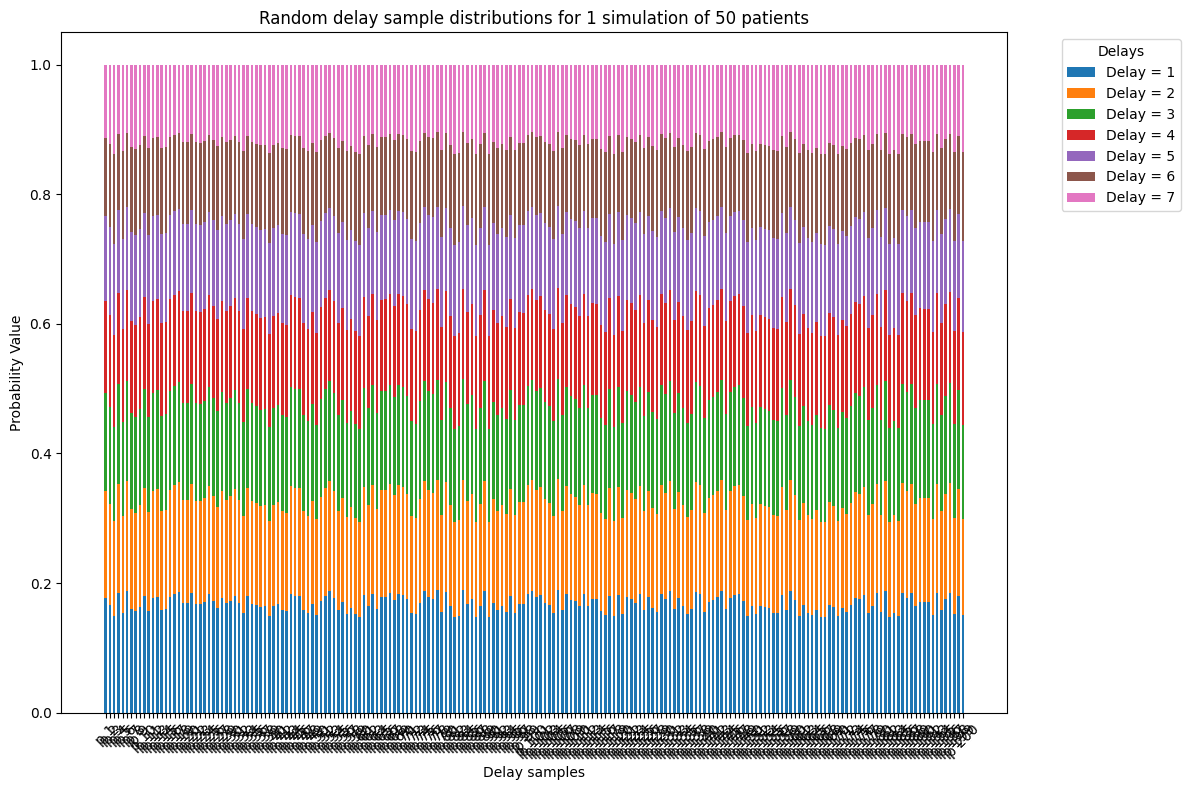

In [38]:
plot_delay_bars(probabilities_sample)

In [24]:
print(delay_vectors)


[array([3., 4., 4., 4., 5., 5., 3., 1., 0., 5., 0., 6., 5., 3., 2., 0., 0.,
       5., 0., 3., 5., 1., 5., 0., 1., 3., 2., 5., 1., 5., 3., 0., 0., 1.,
       5., 2., 5., 1., 1., 0., 5., 5., 2., 3., 1., 3., 1., 6., 5., 6., 1.,
       6., 0., 2., 0., 2., 1., 4., 5., 3., 2., 5., 0., 5., 5., 0., 5., 5.,
       1., 1., 5., 3., 3., 1., 6., 4., 4., 6., 2., 5., 0., 0., 6., 4., 1.,
       2., 3., 1., 0., 6., 2., 2., 2., 3., 5., 3., 3., 3., 0., 5., 5., 5.,
       5., 1., 1., 1., 1., 0., 6., 1., 1., 5., 4., 1., 1., 4., 6., 6., 3.,
       1., 2., 4., 2., 1., 2., 2., 4., 4., 3., 0., 4., 2., 0., 3., 1., 2.,
       0., 2., 3., 2., 5., 3., 5., 4., 0., 5., 4., 4., 2., 0., 1., 2., 3.,
       2., 5., 1., 1., 5., 3., 4., 2., 1., 2., 0., 2., 5., 3., 2., 6., 5.,
       0., 3., 3., 3., 4., 0., 1., 1., 5., 5., 5., 0., 4., 2., 5., 3., 4.,
       4., 3., 6., 3., 1., 4., 2., 2., 4., 0., 1., 1., 0., 4., 6., 1., 0.,
       5., 2., 1., 4., 4., 3., 4., 6., 5., 6., 5., 0., 5., 1., 5., 4., 0.,
       0., 4., 4., 3., 1

Shape of delay_vectors: (96, 200)
7
[array([15,  9, 10, 16, 16, 17, 16, 18, 18, 15, 16, 20, 21, 19, 17, 16, 18,
       14, 19, 16, 10, 16, 18, 11, 17, 15, 16, 16, 15, 17, 15, 19, 16, 17,
       20, 19, 20, 17, 17, 13, 11, 11, 18, 18, 20, 14, 16, 12, 14,  8, 13,
       16, 16, 20, 20, 18, 16, 20, 18, 17, 13,  9, 12, 12, 15, 19, 17, 21,
       22, 22, 17, 13, 17, 17,  7, 15, 10, 11, 23, 18, 19, 14, 14, 21, 17,
       19, 19, 14, 12, 12, 14, 18, 11, 19, 17, 17, 13,  9, 15, 19, 18, 17,
       16, 15, 18, 24, 19, 17, 18, 15, 12, 12, 10, 19, 16, 14, 19, 23, 10,
       16, 18, 24, 14, 13, 17, 23, 19, 16, 19, 19, 15, 18, 21, 17, 21, 23,
       11, 15, 15, 18, 13, 14, 20, 23, 15, 20, 20, 17, 17, 23, 15, 13, 18,
       15, 18, 14, 10, 16, 17, 16, 19, 11, 15, 14, 14, 22, 16, 18, 15, 15,
       15, 15, 13, 20, 18, 13, 14, 13, 14, 16, 16, 17, 13, 19, 17, 17, 18,
       11, 14, 14, 15, 15, 18, 18, 16, 18, 27, 13, 26, 14]), array([15, 19, 16, 14, 13, 13, 11, 11, 15, 16, 14, 19, 20, 13, 16, 20, 11,
  

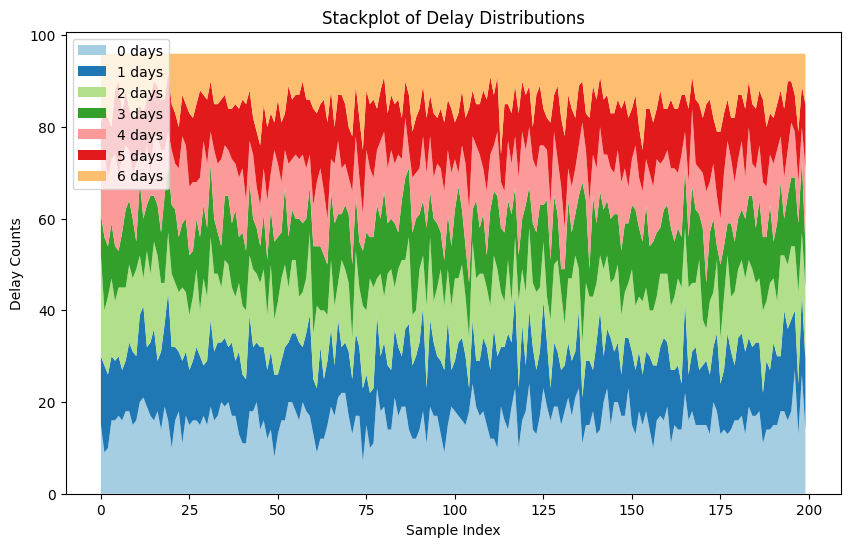

In [48]:


# Ensure delay_vectors is a NumPy array
delay_vectors = np.array(delay_vectors)  # Replace with your actual data

# Check the structure of delay_vectors
print("Shape of delay_vectors:", delay_vectors.shape)

# Define delay values
delays = range(0, 7)  # Delay values from 1 to 7

# Calculate delay counts for each sample
delay_counts = [np.sum(delay_vectors == delay, axis=0) for delay in delays]
print(len(delay_counts))
print(delay_counts)
delay_counts = np.array(delay_counts)
print(delay_counts.shape)

# Create a stackplot
x = np.arange(delay_vectors.shape[1])  # Number of samples
palette = sns.color_palette("Paired", n_colors=len(delays))
plt.figure(figsize=(10, 6))
plt.stackplot(x, delay_counts, labels=[f'{d} days' for d in delays], colors=palette)
plt.title('Stackplot of Delay Distributions')
plt.xlabel('Sample Index')
plt.ylabel('Delay Counts')
plt.legend(loc='upper left')
plt.show()


Shape of delay_vectors: (96, 200)
[3253 3000 2991 2701 2507 2509 2239]


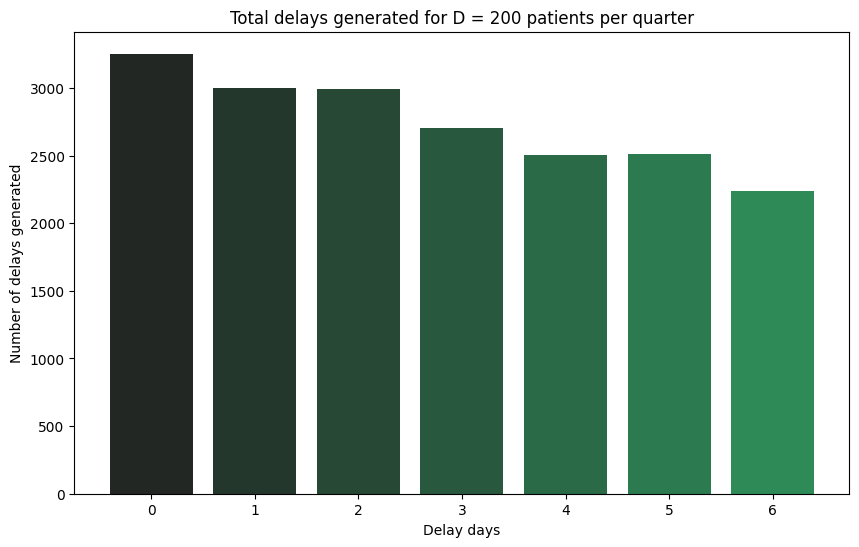

In [70]:
# Ensure delay_vectors is a NumPy array
delay_vectors = np.array(delay_vectors)  # Replace with your actual data

# Check the structure of delay_vectors
print("Shape of delay_vectors:", delay_vectors.shape)

# Define delay values
delays = range(0, 7)  # Delay values from 1 to 7

# Calculate delay counts for each sample
delay_counts = [np.sum(delay_vectors == delay, axis=0) for delay in delays]
delay_counts_array = np.array(delay_counts)

# sum all the values in each row of the delay_counts_array
total_delays = np.sum(delay_counts_array, axis=1)
print(total_delays)
# Create a stackplot
x = delays
y = total_delays  # Number of samples

# plot a bar chart using x and y
# add all relevant labels to the chart and make it look appealing
# color it using a sns color palette
palette = sns.dark_palette("seagreen", n_colors=len(delays))
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=palette)
plt.title(f'Total delays generated for D = {n} patients per quarter')
plt.xlabel('Delay days')
plt.ylabel('Number of delays generated')
plt.xticks(x)
plt.show()

